# "Representation of Rainfall Station, Pakistan"
By: Muhammad Danish\
Contact: docdanish9028@gmail.com\
Github: https://github.com/danish-abbasi-github\

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt

In [7]:
# Importing the file
file_path = 'D:\\Rainfall_Pak.csv'

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')

C:\Users\HP\AppData\Local\Temp\ipykernel_20616\1764473716.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\HP\AppData\Local\Temp\ipykernel_20616\1764473716.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_stations))


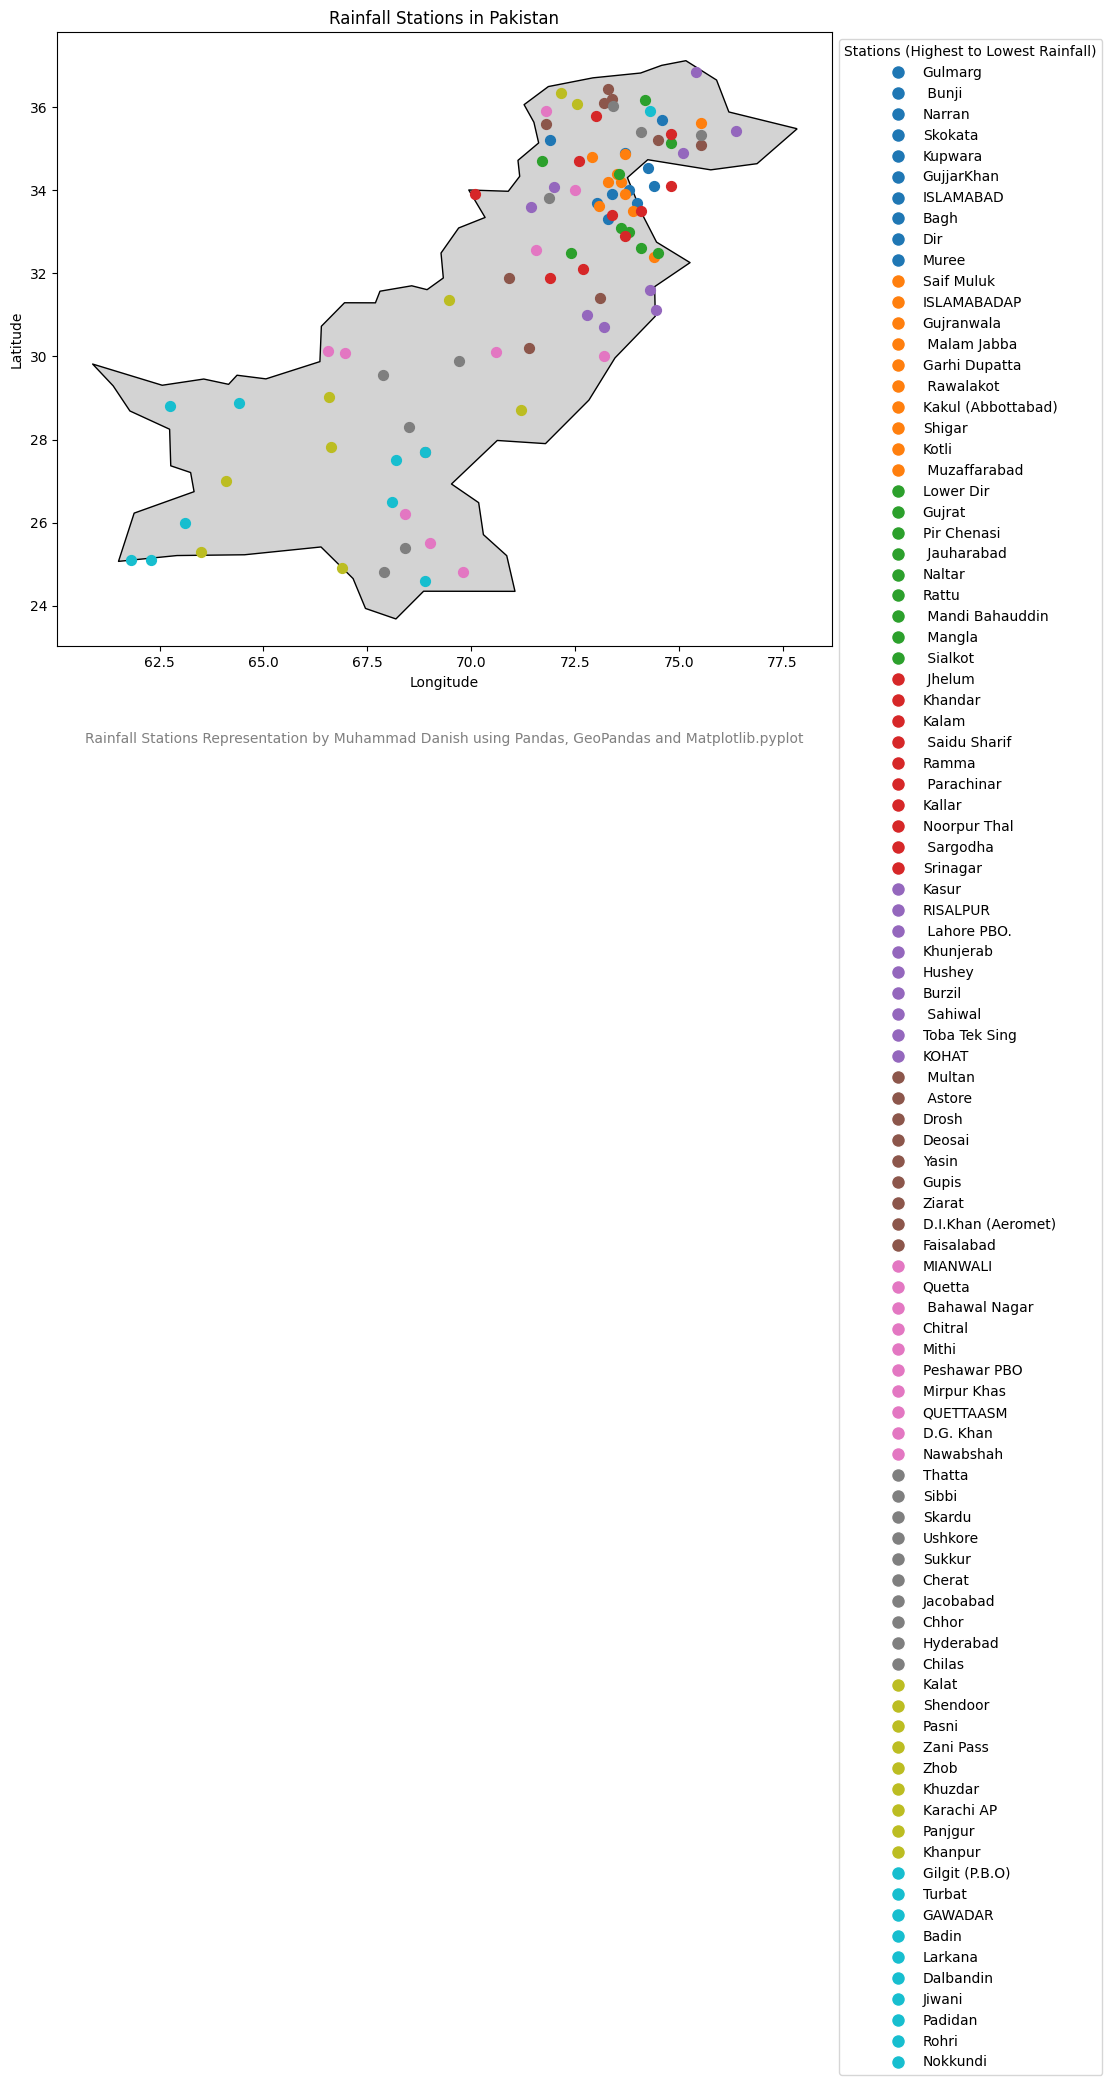

In [8]:
# Getting the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# include only Pakistan
pakistan_map = world[world['name'] == 'Pakistan']

# Creating GeoDataFrame for rainfall data
geometry = gpd.points_from_xy(df['Longitude'], df['Latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Sorting the data by rainfall in descending order
gdf_sorted = gdf.sort_values(by='Rainfall (mm)', ascending=False)

# Plotting the map
fig, ax = plt.subplots(figsize=(10, 10))
pakistan_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plotting rainfall stations with different colors based on station and sorted by rainfall
unique_stations = gdf_sorted['Station'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_stations))

for station, color in zip(unique_stations, colors(range(len(unique_stations)))):
    station_data = gdf_sorted[gdf_sorted['Station'] == station]
    station_data.plot(ax=ax, marker='o', color=color, label=station, markersize=50)

# Adding legend at the corner of the map
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=station)
                   for station, color in zip(unique_stations, colors(range(len(unique_stations))))]

ax.legend(handles=legend_elements, title='Stations (Highest to Lowest Rainfall)', loc='upper left', bbox_to_anchor=(1, 1))

# Adding labels for x-axis and y-axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.text(0.5, -0.15, 'Rainfall Stations Representation by Muhammad Danish using Pandas, GeoPandas and Matplotlib.pyplot', horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes, fontsize=10, color='gray')

plt.title('Rainfall Stations in Pakistan')
plt.show()
